## Efficiency based on HDBSCAN clusters

For an inferred cluster $k$, define the following variables:

- $C =$ total cost of trips

- $N =$ total passengers

- $M =$ total number of trips

- $c = \frac{C}{N} =$ trip cost per capita

- $\bar{c} = \frac{C}{M} =$ unit cost of trips

<br>

Define the efficiency $E$ relative to aggregation:

- $E = \frac{c_v}{c} = \frac{\text{cost per capita aggregated}}{\text{cost per capita actual}}$

- $c_v = \frac{\alpha \cdot \bar{c} \cdot M_v}{N} =$ van trip cost per capita

- $\alpha =$ relative van operating cost

- $M_v = \lceil N/S \rceil =$ number of van trips 

- $S =$ microtransit van capacity

<br>

Because the cost terms cancel, efficiency $\approx$ relative packing:

- $E = \alpha \cdot \frac{M_v}{M} \rightarrow \frac{E}{\alpha} = \frac{M_v}{M}$ (unitless)

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
datadir = os.path.join('..', 'data')
pth = os.path.join(datadir, 'trip_cluster.parquet')
df = gpd.read_parquet(pth)

In [3]:
S = 6         # typical microtransit van capacity
msk_clus = (df.cluster_label > -1)
df_clus = df.loc[msk_clus].groupby('cluster_label')
N = df_clus.passenger_count.transform('sum')
M = df_clus.passenger_count.transform('size')
Mv = np.ceil(N / S)
df.loc[msk_clus, 'packing_efficiency'] = Mv / M
df

,medallion,hack_license,pickup,pickup_datetime,vendor_id,rate_code,store_and_fwd_flag,dropoff_datetime,passenger_count,trip_time_in_secs,...,Shape_Area_pickup_,dropoff,index_dropoff,BoroCode_dropoff,BoroName_dropoff,Shape_Leng_dropoff,Shape_Area_dropoff,euclidean_distance,cluster_label,packing_efficiency
0,6EE35E76FB48F9B79A337DDE55381126,16DA2E2A5B7CF561C21886460B636A31,POINT (9.98e+05 2.41e+05),2013-06-03 00:00:00,CMT,1,N,2013-06-03 00:04:25,1,206,...,6.363981e+08,POINT (9.96e+05 2.39e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.526704,-1,NaN
1,9400FEF51A4DE705BD4578E3AB86A318,A0C7F56B74AB6A80B8B602B8F46262A8,POINT (9.92e+05 2.17e+05),2013-06-03 00:00:00,CMT,1,N,2013-06-03 00:05:23,4,310,...,6.363981e+08,POINT (9.96e+05 2.2e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.922924,323,0.277778
2,2B131E11C91746501DB1E449ACFDDED5,2C24F168E6F6B8EC4A4D96E575C0EC40,POINT (1.02e+06 2.19e+05),2013-06-03 00:00:00,CMT,1,N,2013-06-03 00:15:53,1,911,...,3.045058e+09,POINT (9.99e+05 2.17e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,4.512526,164988,0.179245
3,D6B1A78F308FDE278D231C220F83D2A5,931B3AE4A8931DD58BA3E42766889BEC,POINT (9.93e+05 2.17e+05),2013-06-03 00:00:00,CMT,1,N,2013-06-03 00:16:43,1,944,...,6.363981e+08,POINT (1.01e+06 2.18e+05),4.0,4.0,Queens,896934.880411,3.045058e+09,2.873268,165276,0.285714
4,453B4DFA908932D761EF47FE919CDD72,A7B7AAEF95483779C50A7A0551EBD2E4,POINT (9.85e+05 2.01e+05),2013-06-03 00:00:00,CMT,1,N,2013-06-03 00:08:29,1,505,...,6.363981e+08,POINT (9.89e+05 2.03e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.952522,56154,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526788,FA48B4171DF5DAD8991253F81E2BF0FE,B00DC87B11CCEBDABBF86DD1D6E2CD07,POINT (9.85e+05 2.07e+05),2013-06-09 23:57:00,CMT,1,N,2013-06-09 23:58:30,1,74,...,6.363981e+08,POINT (9.85e+05 2.09e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.403466,-1,NaN
1526789,1E268C16FEFBC4384CA90B84F8BDD060,1167EF28EEAC54FEDD1DBE1891B1855E,POINT (9.97e+05 2.23e+05),2013-06-09 23:57:00,CMT,1,N,2013-06-09 23:59:34,1,130,...,6.363981e+08,POINT (9.96e+05 2.2e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.517157,-1,NaN
1526790,68D4B2FDB737B3E4449B8E8FCBEB0CC2,AF905278ACE8A86E989F0B79414571A9,POINT (9.9e+05 2.05e+05),2013-06-09 23:57:00,CMT,1,N,2013-06-09 23:59:59,1,138,...,6.363981e+08,POINT (9.89e+05 2.03e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.431326,162555,0.250000
1526791,D42076D7B45BCFBB8D544D765C2FB094,DC3A15804D7193B647BA71166CF161A8,POINT (9.98e+05 2.25e+05),2013-06-09 23:58:00,CMT,1,N,2013-06-09 23:59:36,1,92,...,6.363981e+08,POINT (1e+06 2.28e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.478341,160924,0.250000


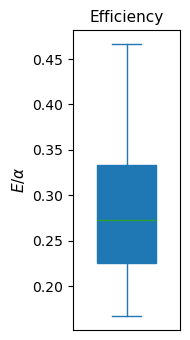

In [5]:
# plot overall efficiency (manhattan only)
fig, ax = plt.subplots(1, 1, figsize = (2, 3.5))
msk_manhattan = (df.BoroName_pickup_ == 'Manhattan')
df.loc[msk_manhattan].packing_efficiency.plot(
    kind = 'box',
    widths = .55,
    showfliers = False,
    patch_artist = True,
    ax = ax)
ax.set_xticks([])
ax.set_title('Efficiency', size = 11)
ax.set_ylabel(r'$E / \alpha$', size = 11)
plt.tight_layout()
plt.savefig(os.path.join('..', 'figures', 'efficiency.svg'))

In [ ]:
# plt.figure(figsize = (5, 5))

# for boro in ['Manhattan', 'Brooklyn', 'Queens']:
#     df.loc[df.BoroName_pickup_ == boro].groupby(pd.Grouper(key = 'pickup_datetime', freq = '2h'), sort = True).packing_efficiency.mean().plot(label = boro)

# plt.legend()
# plt.show()